In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 18.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, HTML
import io

### 4F8H

In [ ]:
df_4F8H = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_4F8H.csv')
df_4F8H.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,4F8H,ZINC000767383965,-6.370461,CC(C)[C@H](NC(=O)COC(=O)/C=C\SCc1ccco1)c1ccccc1,GQDMVSPPPPIADEPLTVNTGIYLIECYSLDDKAETFKVNAFLSLS...,"[6, 14, 3, 11, 18, 16, 13, 13, 13, 13, 8, 1, 3...",0.055784,1.100762,-0.370547,0.134442,[0 1 0 ... 0 0 0],"[6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, 8.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-6.443692,0.073231
1,4F8H,ZINC001497648857,-6.739841,Cc1nc([C@H](C)NC/C=C\CNC(=O)C[C@H]2CC=CCC2)no1,GQDMVSPPPPIADEPLTVNTGIYLIECYSLDDKAETFKVNAFLSLS...,"[6, 14, 3, 11, 18, 16, 13, 13, 13, 13, 8, 1, 3...",-1.112315,-0.131417,0.687259,0.134442,[0 1 1 ... 0 0 0],"[6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, ...","[1.0, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-6.499179,0.240662


In [ ]:
len(df_4F8H)

6797

In [ ]:
threshold = 0.001
well_predicted_dfs_by_pdb_id = {}


df_4F8H['difference'] = abs(df_4F8H['docking_score'] - df_4F8H['predicted_scores'])
well_predicted_df = df_4F8H[df_4F8H['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
264,4F8H,ZINC001150567179,-6.607286,Cc1[nH][nH]c2ncnc(=NC(=O)c3cc4cnccc4nc3C(F)(F)...,GQDMVSPPPPIADEPLTVNTGIYLIECYSLDDKAETFKVNAFLSLS...,"[6, 14, 3, 11, 18, 16, 13, 13, 13, 13, 8, 1, 3...",0.052049,-0.280790,0.687259,0.134442,[0 0 0 ... 0 0 0],"[6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 7.0, 6.0, ...","[1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-6.60652,0.000766
323,4F8H,ZINC001760502527,-6.442638,C=CCN(CCOC)c1nnc(-c2ccc[nH]2)n1C[C@@]1(O)CCCC1...,GQDMVSPPPPIADEPLTVNTGIYLIECYSLDDKAETFKVNAFLSLS...,"[6, 14, 3, 11, 18, 16, 13, 13, 13, 13, 8, 1, 3...",0.056357,0.174244,0.687259,0.751344,[0 0 0 ... 0 0 0],"[6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, ...","[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-6.44195,0.000688


In [ ]:
len(well_predicted_df)

31

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC001541928342,-6.098685,-6.098685
,ZINC001538006711,-6.456375,-6.456420
,ZINC001010410029,-6.375320,-6.375406
,ZINC000796775765,-6.360368,-6.360396

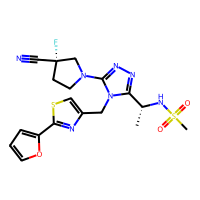
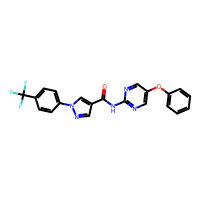
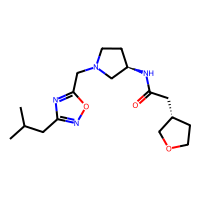
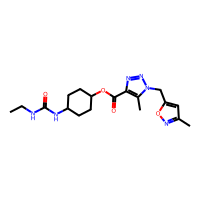

In [ ]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

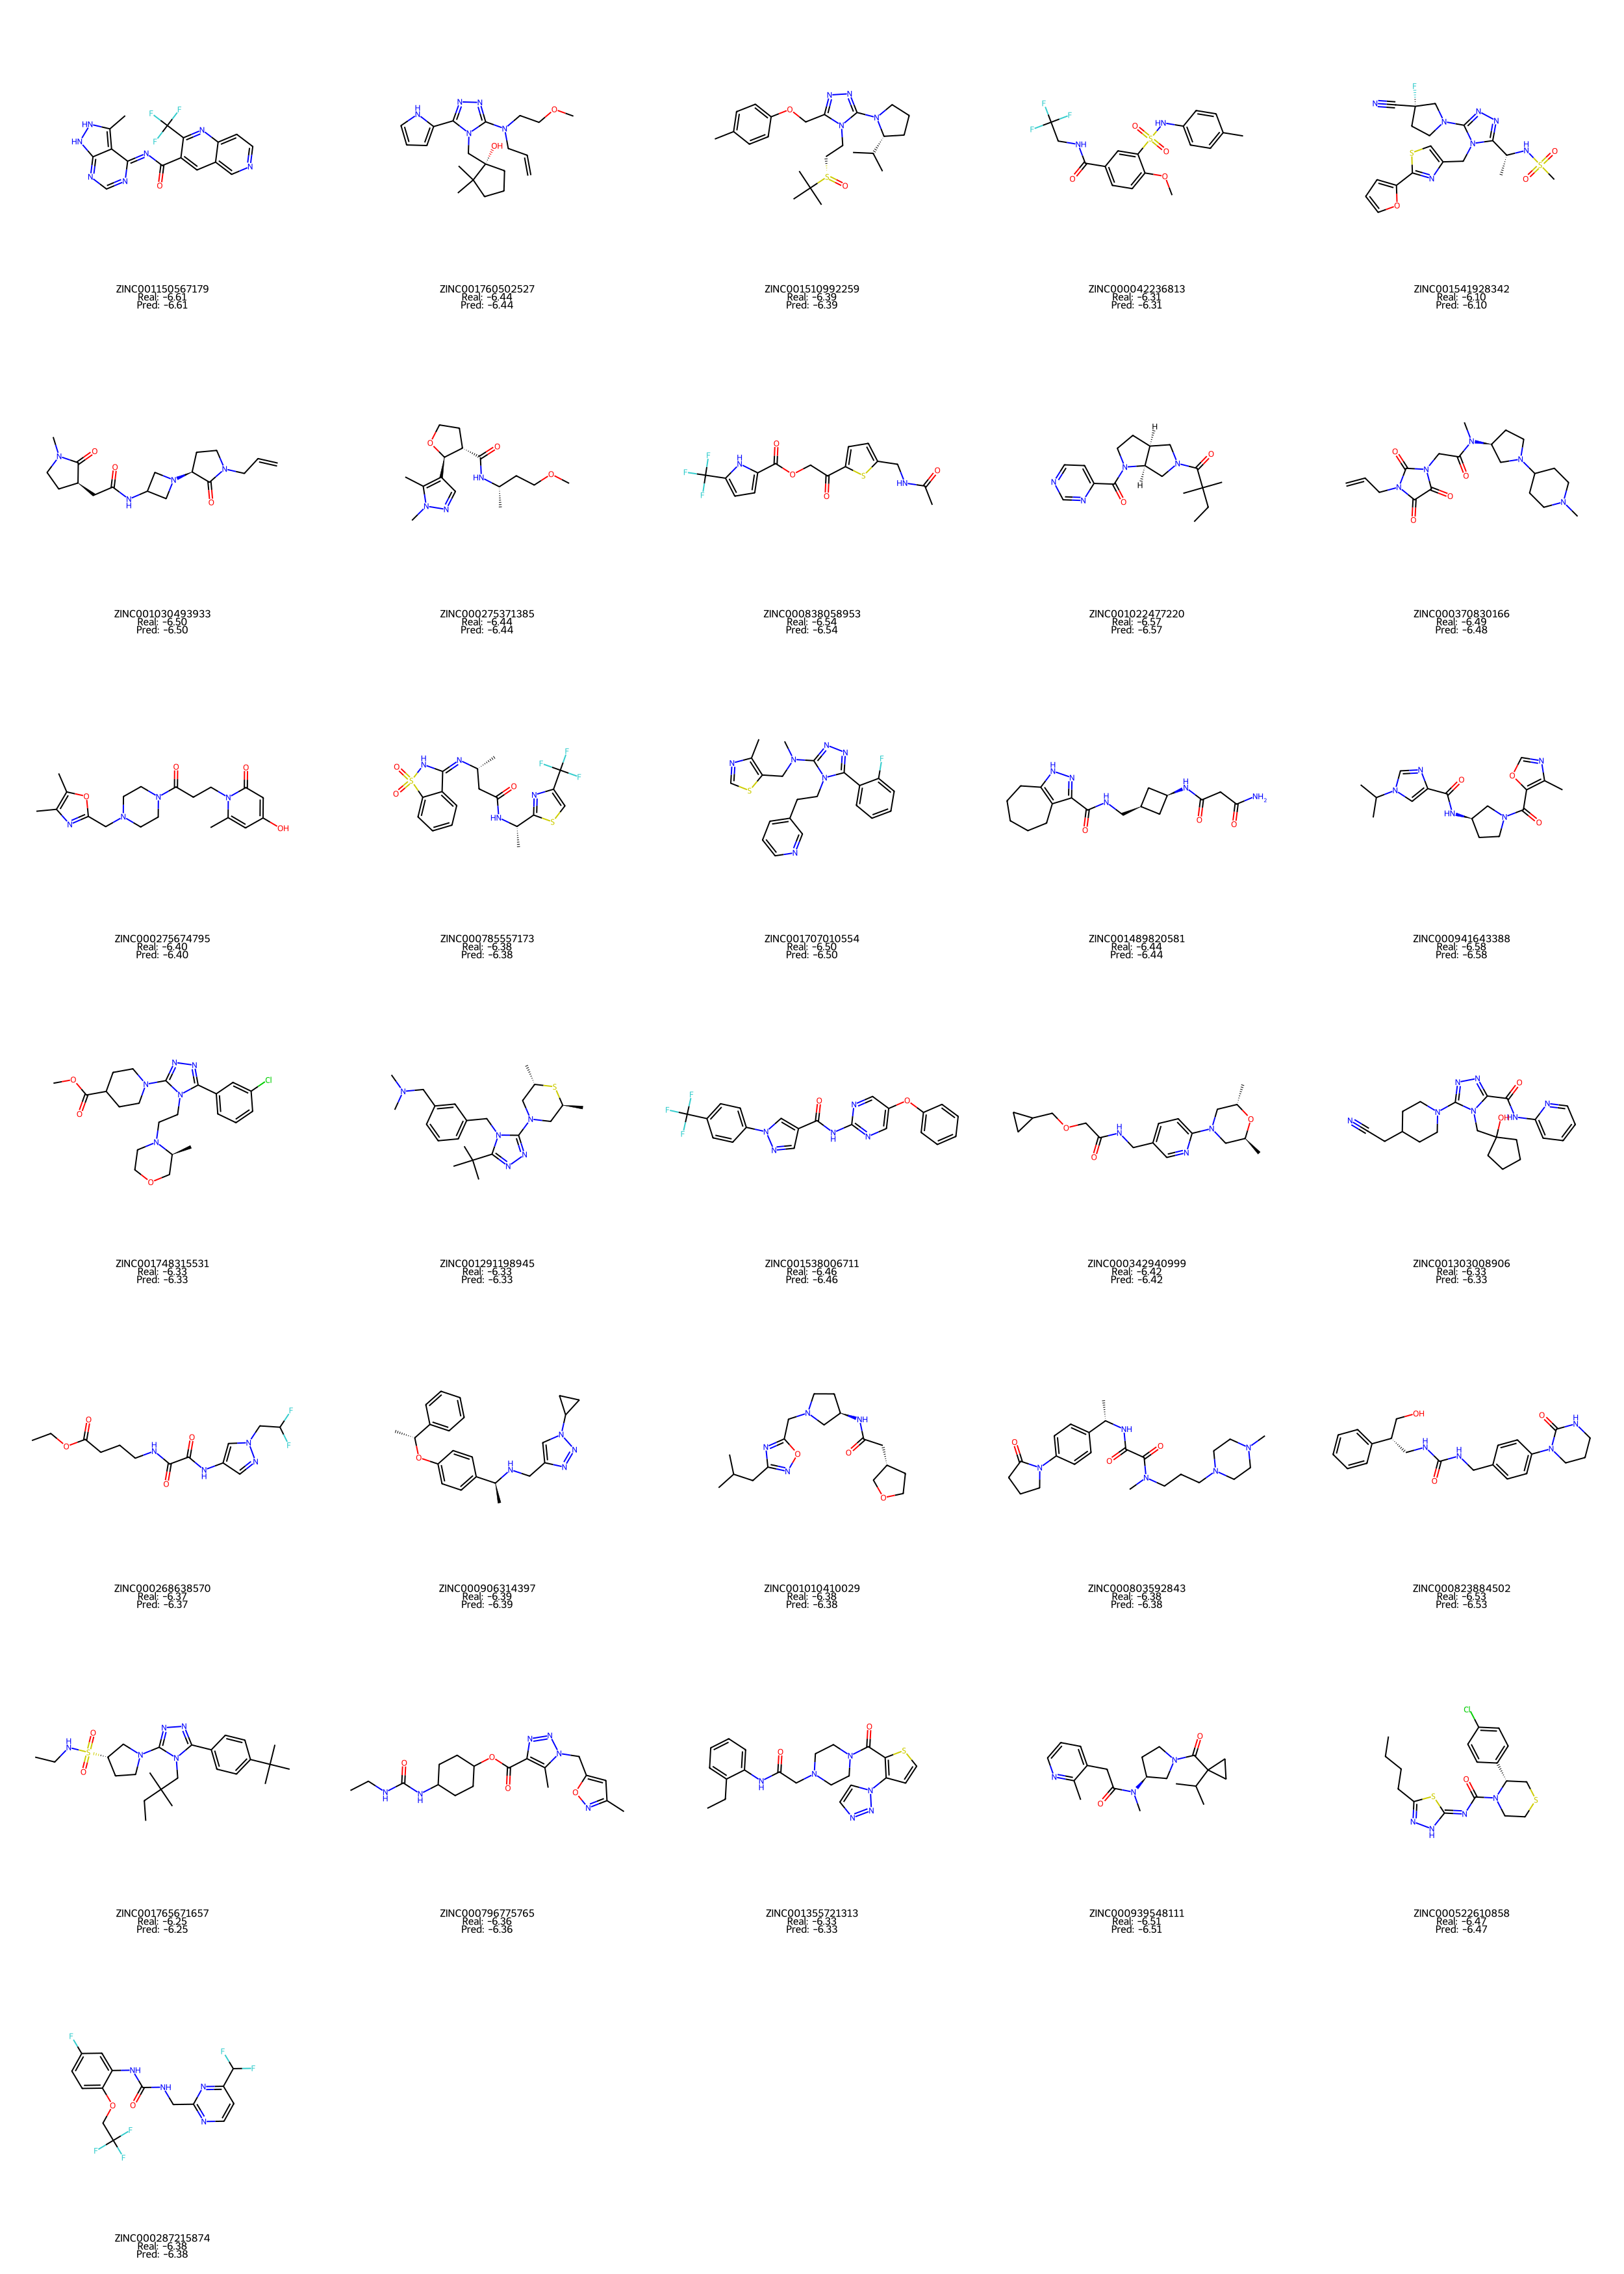

In [ ]:
molecules = [
    (Chem.MolFromSmiles(smiles), f"{zinc_id}\nReal: {score:.2f}\nPred: {predicted_score:.2f}")
    for smiles, zinc_id, score, predicted_score in zip(
        well_predicted_df['smiles'],
        well_predicted_df['zinc_id'],
        well_predicted_df['docking_score'],
        well_predicted_df['predicted_scores']
    )
]

img_grid = Draw.MolsToGridImage(
    [mol for mol, _ in molecules],
    legends=[legend for _, legend in molecules],
    molsPerRow=5,
    subImgSize=(500, 500)
)

display(img_grid)

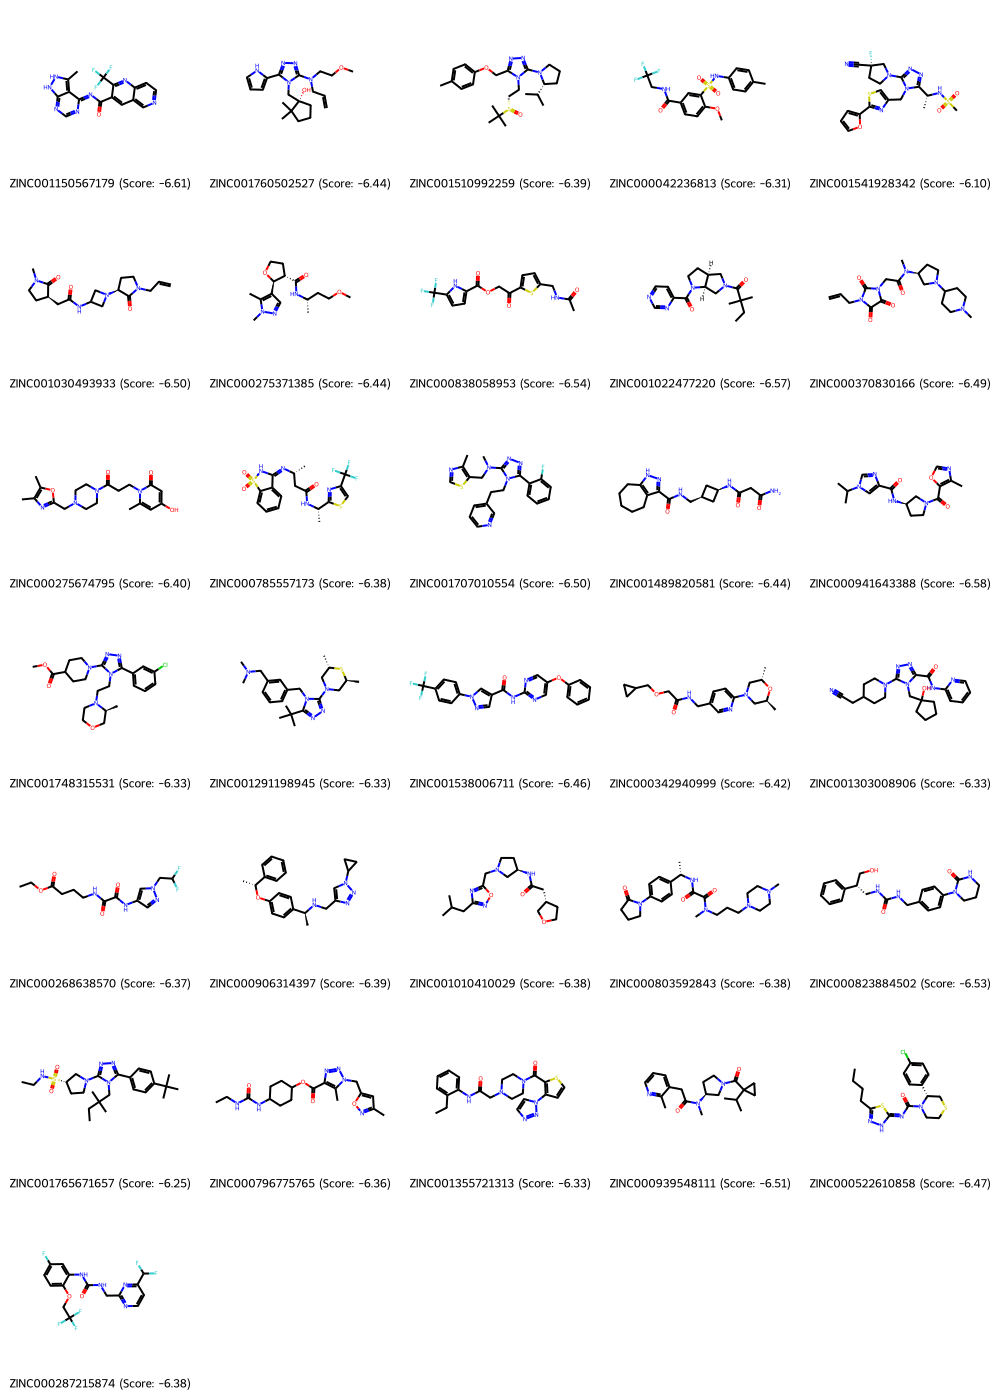

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), f"{zinc_id} (Score: {score:.2f})")
             for smiles, zinc_id, score in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'], well_predicted_df['docking_score'])]

img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules],
                                legends=[legend for _, legend in molecules],
                                molsPerRow=5,
                                subImgSize=(200, 200))

display(img_grid)

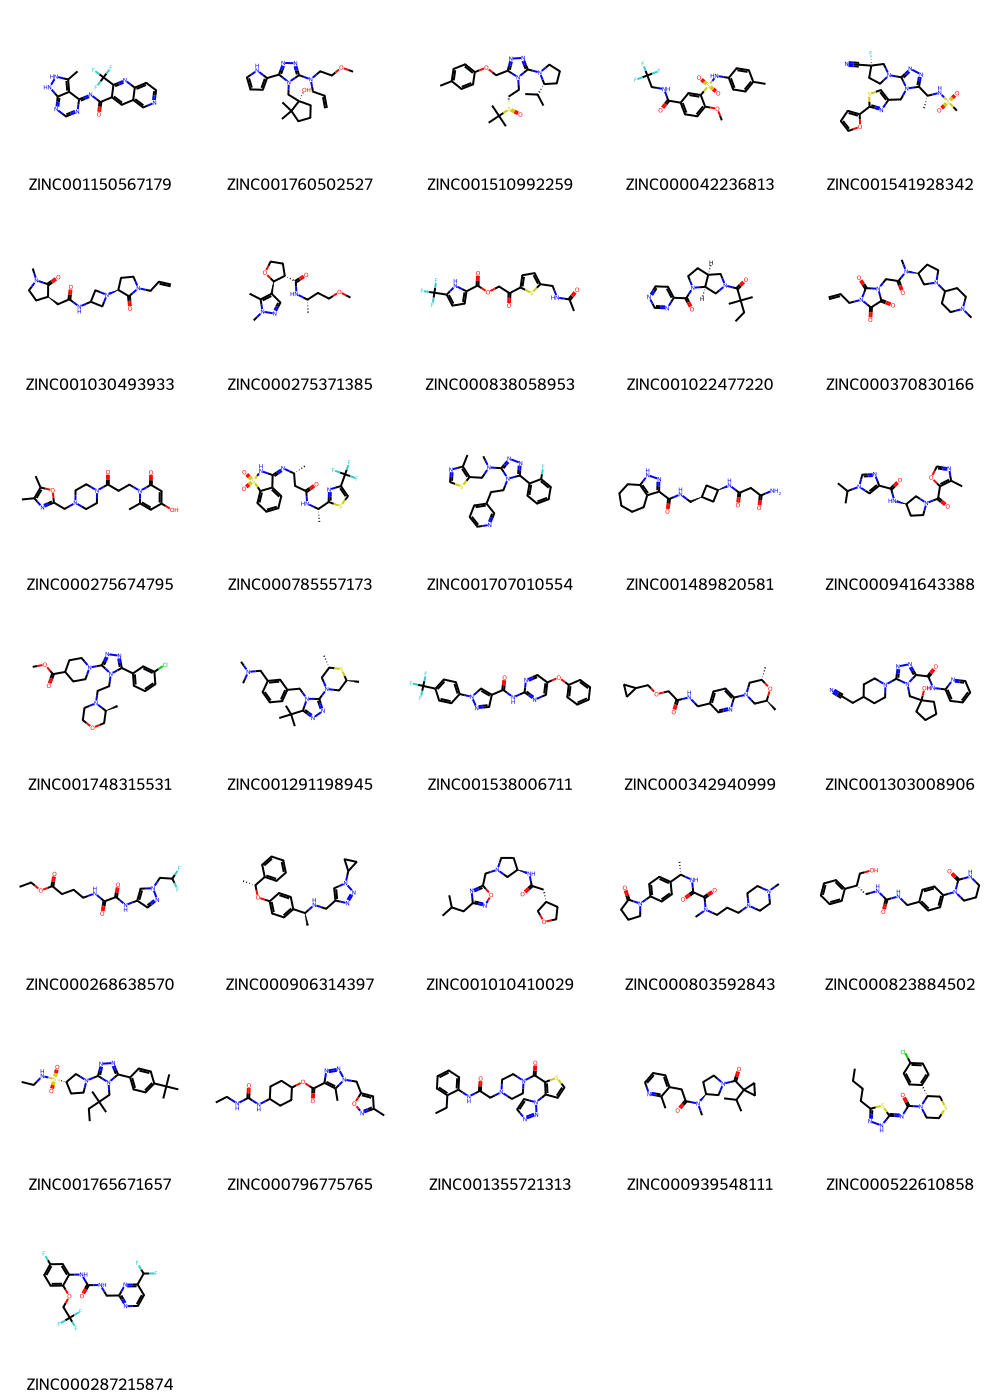

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)

### 2ZV2

In [3]:
df_2ZV2 = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_2ZV2.csv')
df_2ZV2.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,2ZV2,ZINC001077117205,-11.002764,O=C(N[C@@H]1CN(C/C=C\Cl)C[C@H]1O)c1cc2c(o1)CCCC2,GSSGSSGDCVQLNQYTLKDEIGKGSYGVVKLAYNENDNTYYAMKVL...,"[6, 16, 16, 6, 16, 16, 6, 3, 2, 18, 14, 10, 12...",-0.976797,-0.705120,0.687259,-0.482460,[0 0 0 ... 0 0 0],"[8.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, ...","[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-10.764606,0.238158
1,2ZV2,ZINC000629151062,-11.010069,O=C(c1ccnc(N2CCOCC2)n1)N1CCc2c(O)cccc2C1,GSSGSSGDCVQLNQYTLKDEIGKGSYGVVKLAYNENDNTYYAMKVL...,"[6, 16, 16, 6, 16, 16, 6, 3, 2, 18, 14, 10, 12...",-0.646332,-1.058026,-0.370547,0.751344,[0 0 0 ... 0 0 0],"[8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, ...","[2.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-10.776500,0.233569


In [4]:
len(df_2ZV2)

17

In [21]:
threshold = 0.23
well_predicted_dfs_by_pdb_id = {}


df_2ZV2['difference'] = abs(df_2ZV2['docking_score'] - df_2ZV2['predicted_scores'])
well_predicted_df = df_2ZV2[df_2ZV2['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
3,2ZV2,ZINC001685646775,-11.010859,C[C@@H]1CN(C(=O)c2ccc(O)nc2)C[C@H]1CNC(=O)/C=C...,GSSGSSGDCVQLNQYTLKDEIGKGSYGVVKLAYNENDNTYYAMKVL...,"[6, 16, 16, 6, 16, 16, 6, 3, 2, 18, 14, 10, 12...",-0.348711,-0.729827,1.745065,-0.482460,[0 0 0 ... 0 0 0],"[6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, ...","[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.5, 1.5, 1.5, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-10.782258,0.228601
5,2ZV2,ZINC000947496117,-11.039120,Cc1cnc(C(=O)N[C@@H]2CN(C(=O)c3cc(Cl)c[nH]3)C[C...,GSSGSSGDCVQLNQYTLKDEIGKGSYGVVKLAYNENDNTYYAMKVL...,"[6, 16, 16, 6, 16, 16, 6, 3, 2, 18, 14, 10, 12...",-0.212175,-0.038750,0.687259,-1.099361,[0 0 0 ... 0 0 0],"[6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 7.0, 6.0, ...","[1.0, 1.5, 1.5, 1.5, 1.0, 2.0, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-10.810225,0.228895


In [22]:
len(well_predicted_df)

5

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC001685646775,-11.010859,-10.782258
,ZINC000947496117,-11.039120,-10.810225
,ZINC001719561130,-11.009485,-10.779767
,ZINC000956300076,-11.005145,-10.794201
,ZINC001072666303,-11.013759,-10.790892

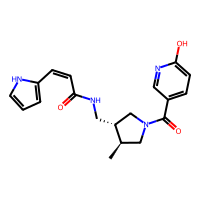
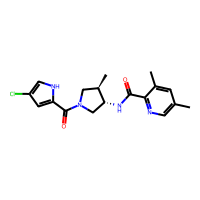
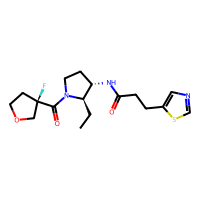
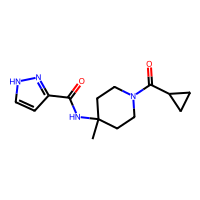
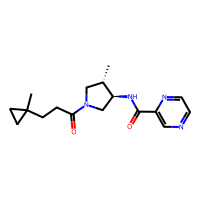

In [23]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

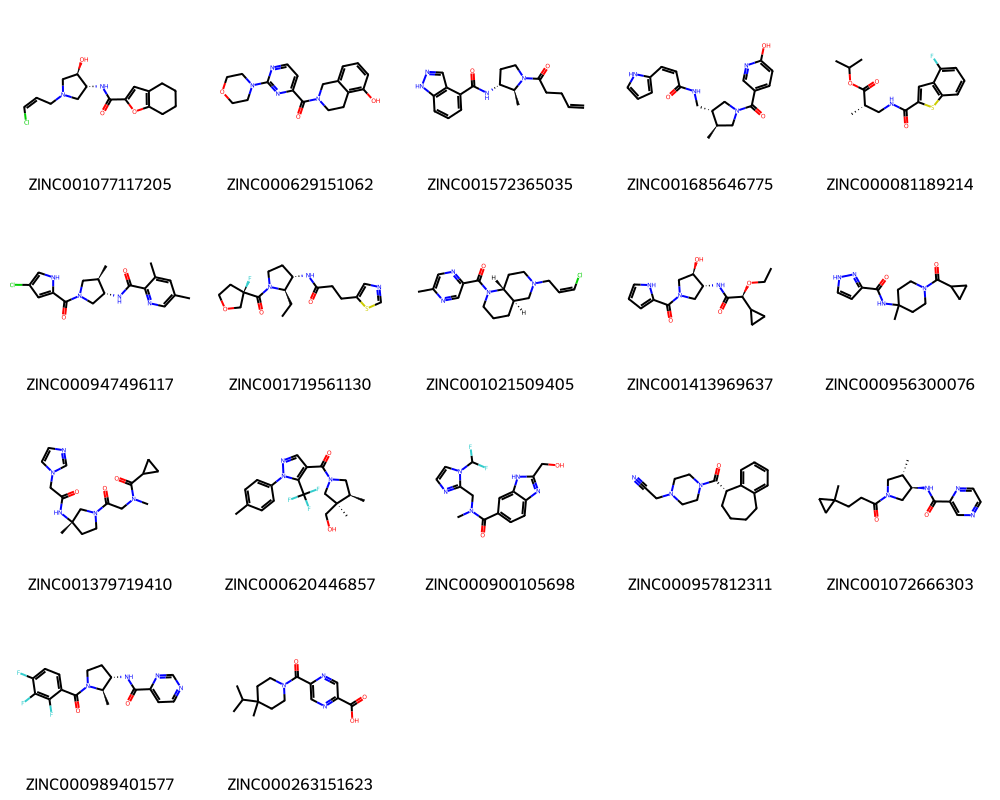

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)

### 1T7R

In [24]:
df_1T7R = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_1T7R.csv')
df_1T7R.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,1T7R,ZINC000766407436,-3.023299,CC[C@@H]1CN(C(=O)Nc2ccc(NC(=O)OC(C)(C)C)cc2)CC...,GSPGISGGGGGSHIEGYECQPIFLNVLEAIEPGVVCAGHDNNQPDS...,"[6, 16, 13, 6, 8, 16, 6, 6, 6, 6, 6, 16, 7, 8,...",0.883423,1.208932,0.687259,-0.482460,[0 1 0 ... 0 0 0],"[6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 7.0, 6.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.5, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-3.198476,0.175177
1,1T7R,ZINC000544552671,-3.699135,CN(C(=O)c1cnc2[nH]nnc2c1)[C@H]1CCCC[C@H]1N(C)C...,GSPGISGGGGGSHIEGYECQPIFLNVLEAIEPGVVCAGHDNNQPDS...,"[6, 16, 13, 6, 8, 16, 6, 6, 6, 6, 6, 16, 7, 8,...",0.311287,-0.647646,-0.370547,0.751344,[0 0 0 ... 0 0 0],"[6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 7.0, ...","[1.0, 1.0, 2.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-3.451277,0.247858


In [25]:
len(df_1T7R)

3893

In [40]:
threshold = 0.0003
well_predicted_dfs_by_pdb_id = {}


df_1T7R['difference'] = abs(df_1T7R['docking_score'] - df_1T7R['predicted_scores'])
well_predicted_df = df_1T7R[df_1T7R['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
136,1T7R,ZINC000775844648,-3.432183,COc1ncc(/C=C/C(=O)N[C@H](c2ccccc2)c2ccc3c(c2)C...,GSPGISGGGGGSHIEGYECQPIFLNVLEAIEPGVVCAGHDNNQPDS...,"[6, 16, 13, 6, 8, 16, 6, 6, 6, 6, 6, 16, 7, 8,...",0.649710,0.834106,-0.370547,0.134442,[0 1 0 ... 1 0 0],"[6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[1.0, 1.0, 1.5, 1.5, 1.5, 1.0, 2.0, 1.0, 2.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-3.431965,0.000218
654,1T7R,ZINC001095268280,-3.366177,CCn1nc(C)c(CN2[C@@H]3CC[C@H]2[C@@H](NC(=O)[C@H...,GSPGISGGGGGSHIEGYECQPIFLNVLEAIEPGVVCAGHDNNQPDS...,"[6, 16, 13, 6, 8, 16, 6, 6, 6, 6, 6, 16, 7, 8,...",-0.177526,-1.855570,-0.370547,1.368245,[0 0 0 ... 0 0 0],"[6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, ...","[1.0, 1.0, 1.5, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-3.365955,0.000222


In [41]:
len(well_predicted_df)

6

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC000775844648,-3.432183,-3.431965
,ZINC001095268280,-3.366177,-3.365955
,ZINC000548231385,-3.374937,-3.374990
,ZINC001310954933,-3.258992,-3.259180
,ZINC000733626128,-3.368908,-3.368735
,ZINC001614507611,-3.269331,-3.269499

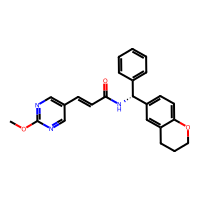
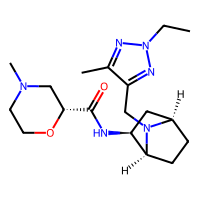
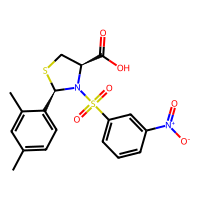
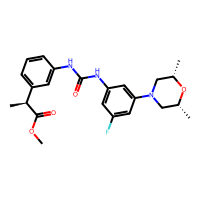
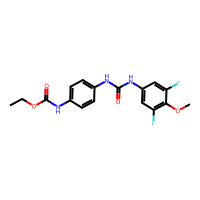
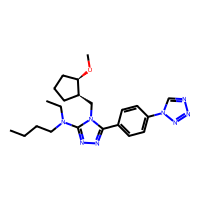

In [42]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

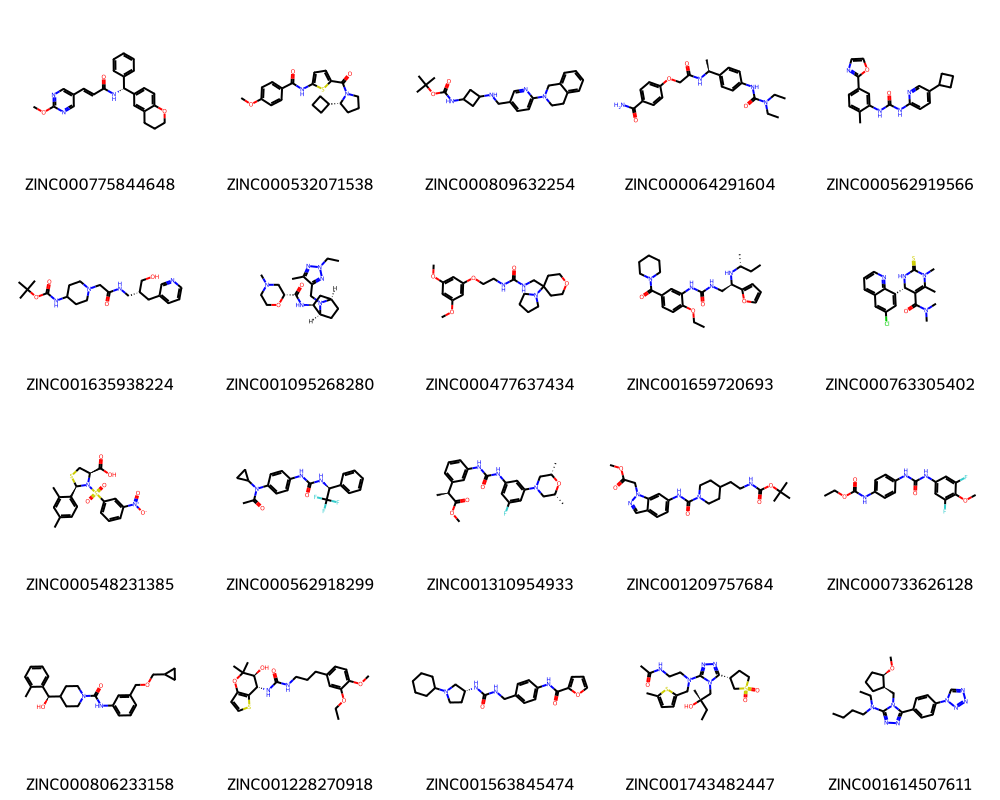

In [28]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)

### 6IIU

In [43]:
df_6IIU = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_6IIU.csv')
df_6IIU.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,6IIU,ZINC000890624425,-12.731217,O=C(c1cc2c(cc1F)NC(=O)CC2)N1Cc2ncccc2N2CCC[C@H...,DYKDDDDGAPADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAA...,"[3, 20, 9, 3, 3, 3, 3, 6, 1, 13, 1, 3, 10, 4, ...",0.203226,0.081592,-0.370547,-0.482460,[0 0 0 ... 0 0 0],"[8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, ...","[2.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-12.856340,0.125123
1,6IIU,ZINC001585527333,-12.520425,CCN(CCCNC(=O)C[C@H]1CCCc2ccccc21)C1CCCCC1,DYKDDDDGAPADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAA...,"[3, 20, 9, 3, 3, 3, 3, 6, 1, 13, 1, 3, 10, 4, ...",-0.303220,1.533364,-0.370547,-1.716263,[0 0 1 ... 0 0 0],"[6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-12.763056,0.242631


In [44]:
len(df_6IIU)

6170

In [45]:
threshold = 0.0003
well_predicted_dfs_by_pdb_id = {}


df_6IIU['difference'] = abs(df_6IIU['docking_score'] - df_6IIU['predicted_scores'])
well_predicted_df = df_6IIU[df_6IIU['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
3113,6IIU,ZINC000369098888,-12.741795,Cn1nc2n(c1=O)CCN(C(=O)CCSCc1ccccc1)C2,DYKDDDDGAPADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAA...,"[3, 20, 9, 3, 3, 3, 3, 6, 1, 13, 1, 3, 10, 4, ...",-0.815097,-1.035277,-1.428353,0.751344,[0 1 0 ... 0 0 0],"[6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, ...","[1.0, 1.5, 1.5, 1.5, 1.5, 2.0, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-12.741509,0.000286
3606,6IIU,ZINC001624791566,-12.742296,CCOC(=O)CN(C(=O)c1cc(S(=O)(=O)CC)cnc1O)C1CCC1,DYKDDDDGAPADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAA...,"[3, 20, 9, 3, 3, 3, 3, 6, 1, 13, 1, 3, 10, 4, ...",-0.008867,-1.117308,-0.370547,1.368245,[0 0 0 ... 0 0 0],"[6.0, 6.0, 8.0, 6.0, 8.0, 6.0, 7.0, 6.0, 8.0, ...","[1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-12.742533,0.000237


In [46]:
len(well_predicted_df)

7

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC000369098888,-12.741795,-12.741509
,ZINC001624791566,-12.742296,-12.742533
,ZINC000740007198,-12.732014,-12.732016
,ZINC000865514593,-12.758251,-12.758258
,ZINC001441764929,-12.806189,-12.806427
,ZINC000759939344,-12.645180,-12.645452
,ZINC000594961132,-12.623959,-12.623702

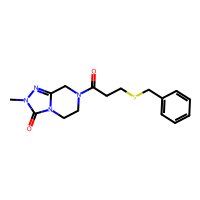
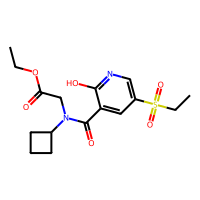
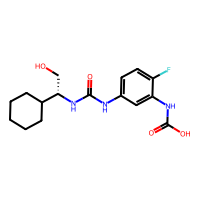
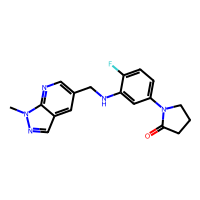
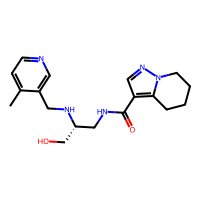
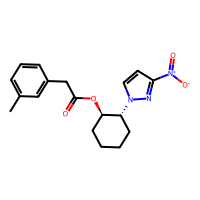
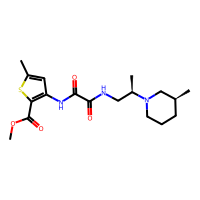

In [47]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

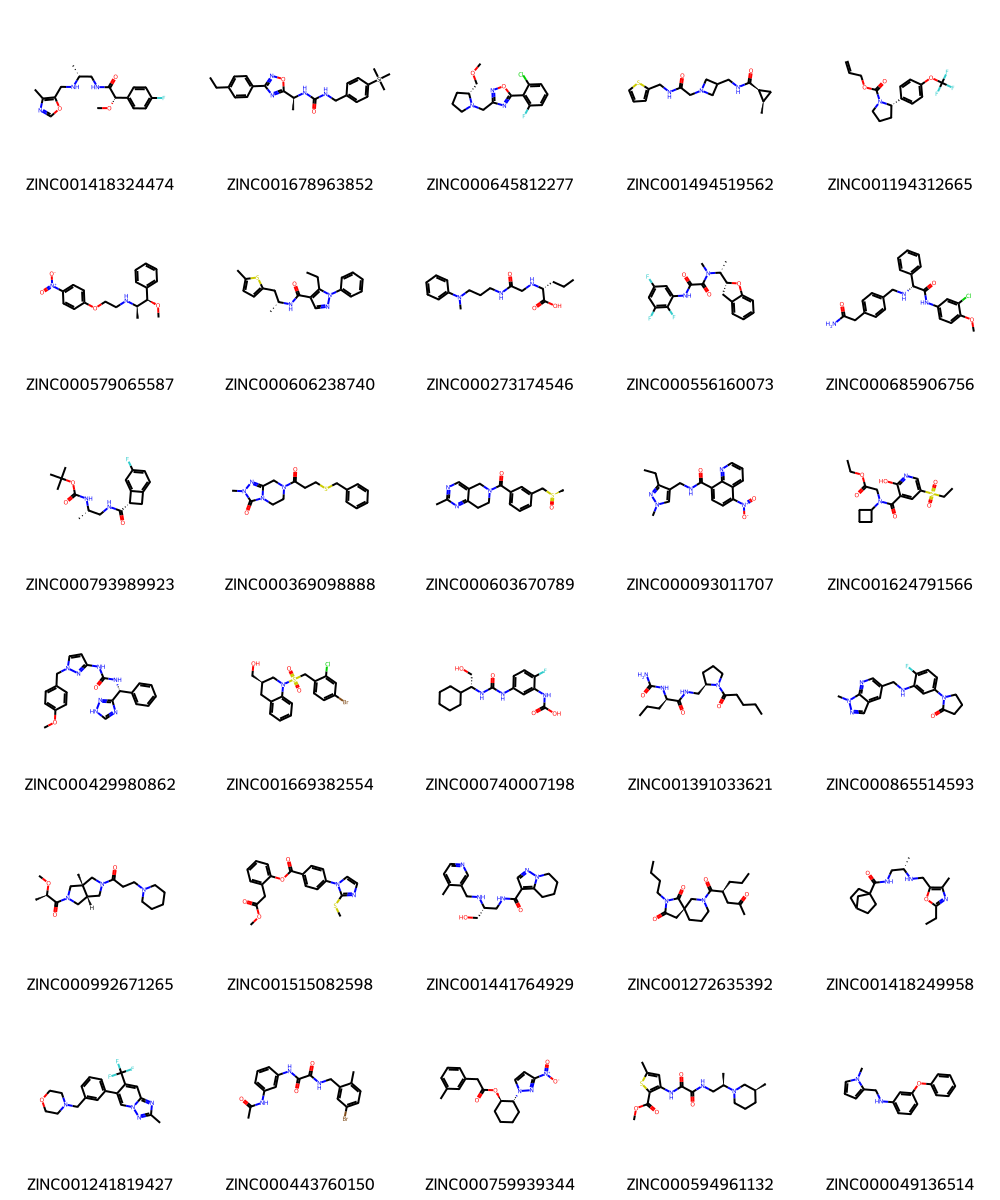

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)

### 6D6T

In [48]:
df_6D6T = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_6D6T.csv')
df_6D6T.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,6D6T,ZINC001240199112,-10.041651,CNS(=O)(=O)c1ccc(-c2cnc(S(C)(=O)=O)nc2)cc1,QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIAS...,"[14, 16, 18, 12, 3, 13, 16, 12, 11, 16, 10, 18...",-0.922077,-1.632090,-0.370547,0.751344,[0 0 0 ... 0 0 0],"[6.0, 7.0, 16.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0,...","[1.0, 1.0, 2.0, 2.0, 1.0, 1.5, 1.5, 1.5, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-9.881832,0.159819
1,6D6T,ZINC001039788052,-10.015778,C[C@H](C#N)C(=O)N1CC[C@](O)(CNC(=O)CCc2nccs2)C1,QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIAS...,"[14, 16, 18, 12, 3, 13, 16, 12, 11, 16, 10, 18...",-0.730481,-1.737714,0.687259,0.751344,[0 1 0 ... 0 0 0],"[6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 7.0, 6.0, 6.0, ...","[1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-9.937901,0.077877


In [49]:
len(df_6D6T)

1134

In [59]:
threshold = 0.05
well_predicted_dfs_by_pdb_id = {}


df_6D6T['difference'] = abs(df_6D6T['docking_score'] - df_6D6T['predicted_scores'])
well_predicted_df = df_6D6T[df_6D6T['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
14,6D6T,ZINC000991300168,-10.002303,C=C1CC(C)(C(=O)N2CC[C@@H](NC(=O)c3cn[nH]c3)[C@...,QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIAS...,"[14, 16, 18, 12, 3, 13, 16, 12, 11, 16, 10, 18...",-1.113248,-1.630283,1.745065,-0.482460,[0 0 0 ... 0 0 0],"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, ...","[2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-9.992085,0.010218
229,6D6T,ZINC001039364538,-10.013005,O=C(c1ncccc1O)N1[C@H]2CC[C@H]1CN(Cc1cnns1)CC2,QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIAS...,"[14, 16, 18, 12, 3, 13, 16, 12, 11, 16, 10, 18...",-0.539288,-0.831669,-0.370547,1.368245,[0 0 0 ... 0 0 0],"[8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 8.0, ...","[2.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-10.026266,0.013261


In [60]:
len(well_predicted_df)

6

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC000991300168,-10.002303,-9.992085
,ZINC001039364538,-10.013005,-10.026266
,ZINC001358802440,-10.047435,-10.012819
,ZINC001654233496,-10.004923,-9.968742
,ZINC000998219565,-10.010670,-9.975437
,ZINC001019113076,-10.021570,-9.989089

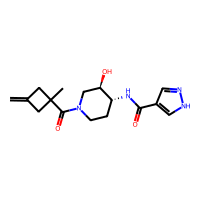
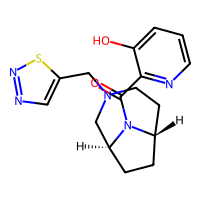
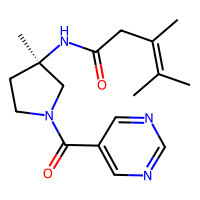
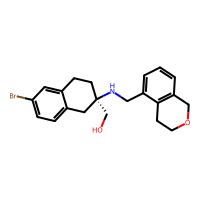
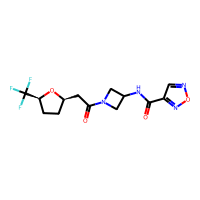
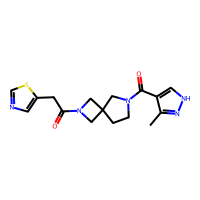

In [61]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

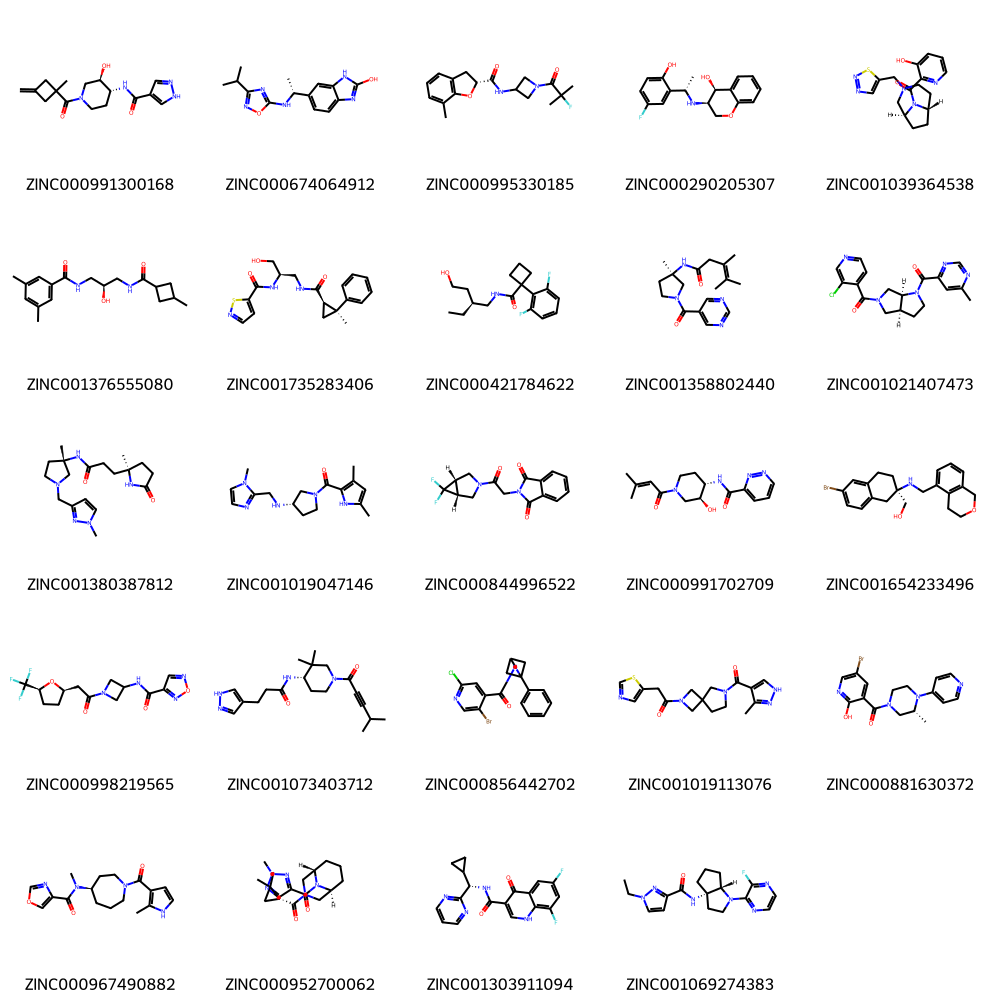

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)

### 5EK0

In [62]:
df_5EK0 = pd.read_csv('/content/drive/MyDrive/Dataframes/well_predicted_df_pdb_id_5EK0.csv')
df_5EK0.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
0,5EK0,ZINC001708820906,-9.013701,CCC(O)(CC)Cn1c(-c2cnn(-c3ccccc3)c2)nnc1N1C[C@@...,MDYKDDDDKGSLVPRGSHMYLRITNIVESSFFTKFIIYLIVLNMVT...,"[11, 3, 20, 9, 3, 3, 3, 3, 9, 6, 16, 10, 18, 1...",1.47894,-0.067781,-0.370547,2.602048,[0 0 0 ... 0 0 0],"[6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 7.0, 6.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-8.811701,0.202000
1,5EK0,ZINC000594115088,-9.005003,CC(C)[C@H](CNC(=O)CCn1cnccc1=O)C(=O)OC(C)(C)C,MDYKDDDDKGSLVPRGSHMYLRITNIVESSFFTKFIIYLIVLNMVT...,"[11, 3, 20, 9, 3, 3, 3, 3, 9, 6, 16, 10, 18, 1...",-0.70920,-0.947898,-0.370547,0.751344,[0 1 0 ... 0 0 0],"[6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-8.854302,0.150701


In [63]:
len(df_5EK0)

2005

In [68]:
threshold = 0.001
well_predicted_dfs_by_pdb_id = {}


df_5EK0['difference'] = abs(df_5EK0['docking_score'] - df_5EK0['predicted_scores'])
well_predicted_df = df_5EK0[df_5EK0['difference'] <= threshold]
well_predicted_df.head(2)

,pdb_id,zinc_id,docking_score,smiles,sequence,encoded_seq,molecular_weight,logP,numH_donors,numH_acceptors,extended_connectivity_fps,node_features,edge_features,adjacency_matrix,predicted_scores,difference
134,5EK0,ZINC000673813450,-9.049726,CC(C)n1ncc2c1nc(-c1ccccc1)cc2C(=O)N1CC[C@@H]2[...,MDYKDDDDKGSLVPRGSHMYLRITNIVESSFFTKFIIYLIVLNMVT...,"[11, 3, 20, 9, 3, 3, 3, 3, 9, 6, 16, 10, 18, 1...",0.924797,1.566884,-1.428353,-0.482460,[0 1 0 ... 0 0 0],"[6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, ...","[1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-9.049082,0.000644
328,5EK0,ZINC001001342624,-9.070040,O=C(Cn1cccn1)N[C@@H]1C[C@H]2CC[C@@H]1N2C(=O)c1...,MDYKDDDDKGSLVPRGSHMYLRITNIVESSFFTKFIIYLIVLNMVT...,"[11, 3, 20, 9, 3, 3, 3, 3, 9, 6, 16, 10, 18, 1...",-0.815946,-1.751634,-0.370547,1.368245,[0 0 0 ... 0 0 0],"[8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, ...","[2.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, ...","[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0....",-9.070451,0.000411


In [69]:
len(well_predicted_df)

6

Molecule,ID,Ground Truth Score,Predicted Score
,ZINC000673813450,-9.049726,-9.049082
,ZINC001001342624,-9.070040,-9.070451
,ZINC001442547588,-9.018704,-9.018840
,ZINC001392631041,-9.012220,-9.012070
,ZINC000967224219,-9.007492,-9.007364
,ZINC001643214511,-9.025814,-9.026664

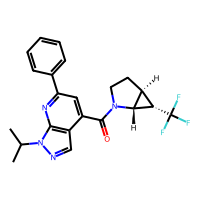
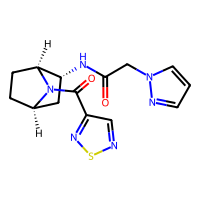
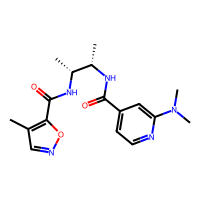
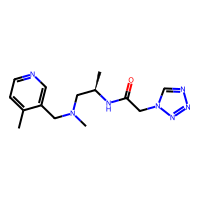
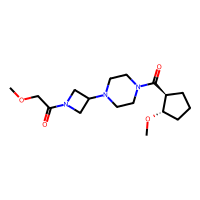
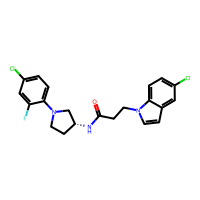

In [70]:
def mol_to_data_url(mol):
    img = Draw.MolToImage(mol, size=(200, 200))
    buf = io.BytesIO()
    img.save(buf, format='PNG')
    img_str = "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode('utf-8')
    return img_str

import base64

data = {
    'Molecule': [f'<img src="{mol_to_data_url(Chem.MolFromSmiles(smiles))}" width="200" height="200">' for smiles in well_predicted_df['smiles']],
    'ID': well_predicted_df['zinc_id'],
    'Ground Truth Score': well_predicted_df['docking_score'],
    'Predicted Score': well_predicted_df['predicted_scores']
}

df = pd.DataFrame(data)

html_table = df.to_html(escape=False, index=False)
display(HTML(html_table))

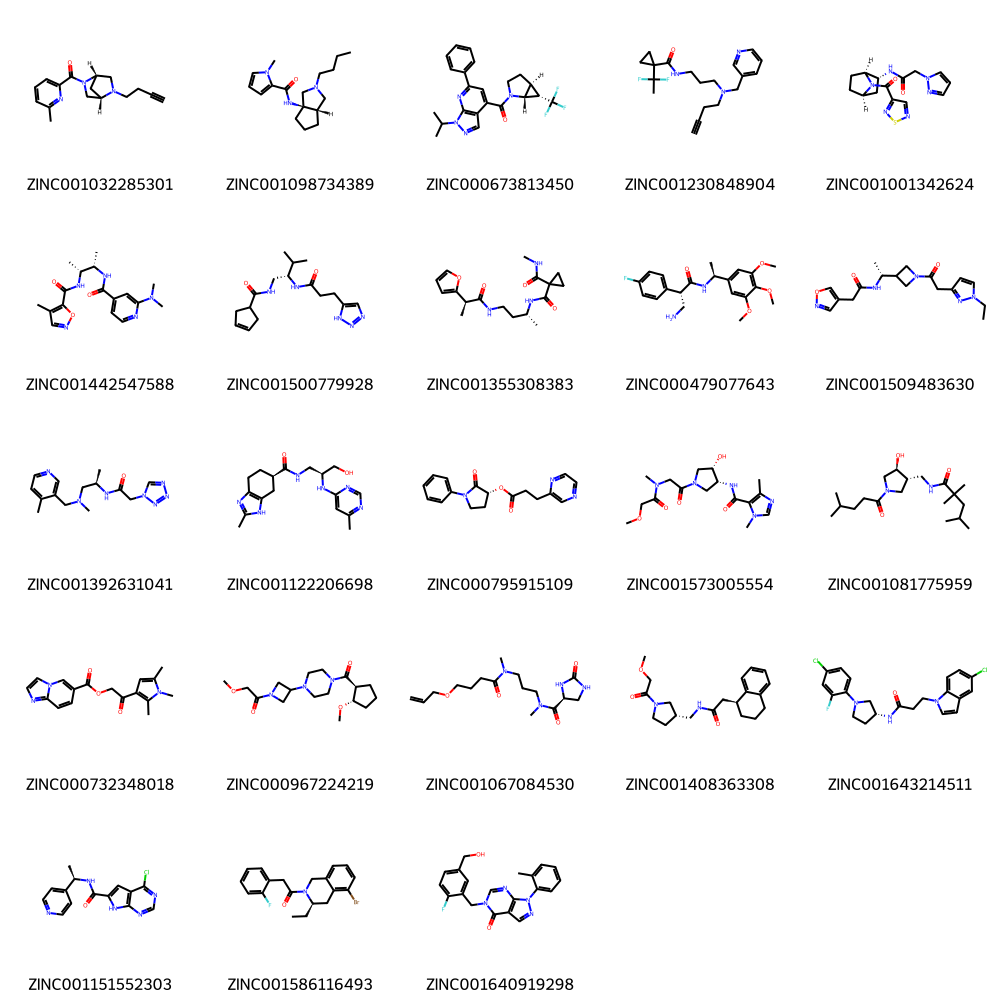

In [ ]:
molecules = [(Chem.MolFromSmiles(smiles), zinc_id) for smiles, zinc_id in zip(well_predicted_df['smiles'], well_predicted_df['zinc_id'])]
img_grid = Draw.MolsToGridImage([mol for mol, _ in molecules], legends=[zinc_id for _, zinc_id in molecules], molsPerRow=5, subImgSize=(200, 200))

display(img_grid)